In [1]:
import numpy as np 
import pandas as pd

from sklearn import datasets
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, homogeneity_score
from sklearn.metrics import completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.neighbors import NearestNeighbors

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
score = ['eps', 'minPoints', 'Silhouette_Score', 'Davies_Bouldin_Score', 'Calinski-Harabasz_Score', 'Homogeneity_Score',
         'Completeness_Score', 'V_Measure_Score', 'Adjusted_Random_Score', 'Adjusted_Mutual_Information_Score', 'Accuracy_Score']

# Iris

In [3]:
iris = pd.read_csv('iris.csv')
iris.head()

sepal.length  sepal.width  petal.length  petal.width species
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

In [4]:
iris.describe()

sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [5]:
iris['species'].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: species, dtype: int64

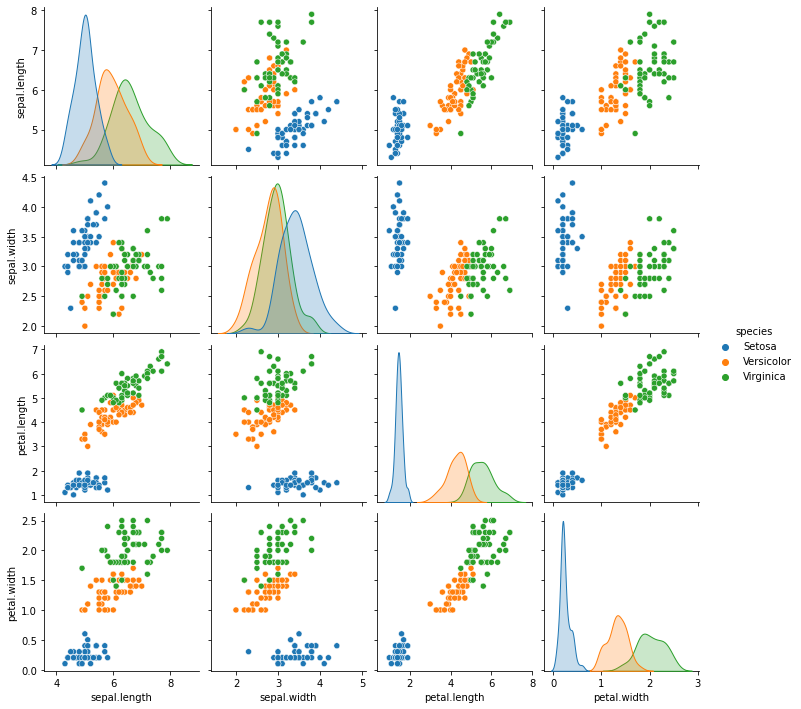

In [5]:
sns.pairplot(iris,hue='species')

Text(0, 0.5, 'petal width')

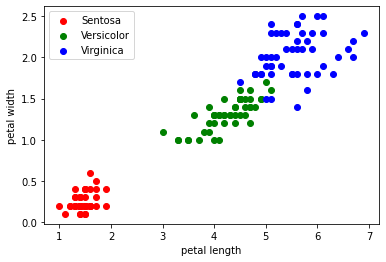

In [6]:
plt.scatter(iris[iris['species']=='Setosa']['petal.length'], iris[iris['species']=='Setosa']['petal.width'], c='red', label='Sentosa')
plt.scatter(iris[iris['species']=='Versicolor']['petal.length'], iris[iris['species']=='Versicolor']['petal.width'], c='green', label='Versicolor')
plt.scatter(iris[iris['species']=='Virginica']['petal.length'], iris[iris['species']=='Virginica']['petal.width'], c='blue', label='Virginica')
plt.legend()
plt.xlabel('petal length')
plt.ylabel('petal width')

In [7]:
iris_true = iris['species'].to_numpy()
iris_num = iris_true.copy()
for i in range(0,len(iris_num)):
    if iris_num[i] == 'Setosa':
        iris_num[i] = 0
    if iris_num[i] == 'Versicolor':
        iris_num[i] = 1
    if iris_num[i] == 'Virginica':
        iris_num[i] = 2

iris = iris.drop(['species'], axis=1)

In [8]:
def accuracy(true, pred):
    count = 0
    for i in range(0,len(true)):
        if true[i] == pred[i]:
            count += 1
    return count/len(true)

Text(0.5, 1.0, 'Nearest Neighbors of Iris dataset')

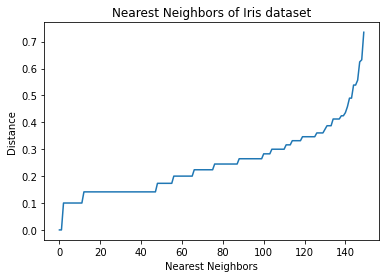

In [9]:
neighbors = NearestNeighbors().fit(iris)
distances, indices = neighbors.kneighbors(iris)
distances = np.sort(distances,axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.xlabel('Nearest Neighbors')
plt.ylabel('Distance')
plt.title('Nearest Neighbors of Iris dataset')

In [10]:
iris_score = pd.DataFrame(columns = score)

In [11]:
eps_list = np.arange(start=0.1, stop=0.9, step=0.1)
min_sample_list = np.arange(start=2, stop=25, step=1)

In [12]:
for i in eps_list:
    for j in min_sample_list:
        all_score = []
        dbscan = DBSCAN(eps=i, min_samples=j)
        iris_pred = dbscan.fit_predict(iris)
        outlier = True
        for item in iris_pred:
            if item != -1:
                outlier = False
                break
        if not outlier:
            all_score.append(i)
            all_score.append(j)
            all_score.append(silhouette_score(iris, iris_pred))
            all_score.append(davies_bouldin_score(iris, iris_pred))
            all_score.append(calinski_harabasz_score(iris, iris_pred))
            all_score.append(homogeneity_score(iris_true, iris_pred))
            all_score.append(completeness_score(iris_true, iris_pred))
            all_score.append(v_measure_score(iris_true, iris_pred))
            all_score.append(adjusted_rand_score(iris_true, iris_pred))
            all_score.append(adjusted_mutual_info_score(iris_true, iris_pred))
            all_score.append(accuracy(iris_num, iris_pred))
            iris_score.loc[len(iris_score.index)] = all_score

In [13]:
iris_score.head()

eps  minPoints  Silhouette_Score  Davies_Bouldin_Score  \
0  0.1        2.0         -0.533442              0.942412   
1  0.2        2.0         -0.252101              2.031321   
2  0.2        3.0         -0.343530              2.501020   
3  0.2        4.0         -0.329805              3.190213   
4  0.2        5.0          0.182564              0.627600   

   Calinski-Harabasz_Score  Homogeneity_Score  Completeness_Score  \
0                 2.767525           0.054539            0.212358   
1                 5.352314           0.424170            0.262045   
2                10.629155           0.256780            0.305325   
3                13.395567           0.159924            0.308854   
4                18.623578           0.127206            0.324840   

   V_Measure_Score  Adjusted_Random_Score  Adjusted_Mutual_Information_Score  \
0         0.086788               0.002668                           0.039278   
1         0.323955               0.062751                           0.239577   
2         0.278956               0.072220                           0.242515   
3         0.210732               0.041965                           0.188021   
4         0.182820               0.040456                           0.166413   

   Accuracy_Score  
0        0.013333  
1        0.066667  
2        0.066667  
3        0.066667  
4        0.066667

In [14]:
maxValues = iris_score.max()
 
print(maxValues)

eps                                    0.800000
minPoints                             24.000000
Silhouette_Score                       0.660447
Davies_Bouldin_Score                  11.608884
Calinski-Harabasz_Score              395.537698
Homogeneity_Score                      0.855589
Completeness_Score                     0.920240
V_Measure_Score                        0.717464
Adjusted_Random_Score                  0.706301
Adjusted_Mutual_Information_Score      0.712576
Accuracy_Score                         0.786667
dtype: float64


In [15]:
iris_show = iris_score.loc[iris_score['Silhouette_Score'] == iris_score['Silhouette_Score'].max()]
iris_show.head()

eps  minPoints  Silhouette_Score  Davies_Bouldin_Score  \
85  0.6       24.0          0.660447              0.397373   

    Calinski-Harabasz_Score  Homogeneity_Score  Completeness_Score  \
85               395.537698           0.519645            0.910697   

    V_Measure_Score  Adjusted_Random_Score  Adjusted_Mutual_Information_Score  \
85         0.661714               0.519933                           0.659036   

    Accuracy_Score  
85            0.32

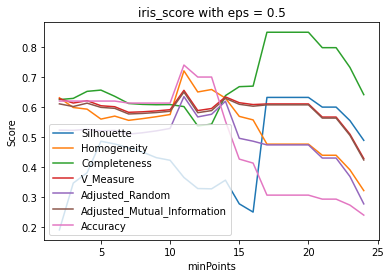

In [16]:
iris_plt = iris_score.loc[iris_score['eps']==0.5]

plt.plot(iris_plt['minPoints'], iris_plt['Silhouette_Score'], label='Silhouette')
#plt.plot(iris_plt['minPoints'], iris_plt['Davies_Bouldin_Score'], label='Davies_Bouldin')
#plt.plot(iris_plt['minPoints'], iris_plt['Calinski-Harabasz_Score'], label='Calinski-Harabasz')
plt.plot(iris_plt['minPoints'], iris_plt['Homogeneity_Score'], label='Homogeneity')
plt.plot(iris_plt['minPoints'], iris_plt['Completeness_Score'], label='Completeness')
plt.plot(iris_plt['minPoints'], iris_plt['V_Measure_Score'], label='V_Measure')
plt.plot(iris_plt['minPoints'], iris_plt['Adjusted_Random_Score'], label='Adjusted_Random')
plt.plot(iris_plt['minPoints'], iris_plt['Adjusted_Mutual_Information_Score'], label='Adjusted_Mutual_Information')
plt.plot(iris_plt['minPoints'], iris_plt['Accuracy_Score'], label='Accuracy')

plt.xlabel('minPoints')
plt.ylabel('Score')
plt.title('iris_score with eps = 0.5')
plt.legend()
plt.show()

In [17]:
dbscan = DBSCAN(eps=0.6, min_samples=8)
iris_pred = dbscan.fit_predict(iris)
print(iris_pred)
iris_pred_df = pd.DataFrame(iris_pred)
iris_pred_df.columns = ['pred_label']

new_iris = pd.concat([iris, iris_pred_df],axis=1)
outlier = new_iris.loc[new_iris['pred_label']==-1]

print(new_iris)
print(outlier)
print(len(outlier))

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1 -1 -1  1  1 -1  1  1  1  1  1  1  1 -1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]
     sepal.length  sepal.width  petal.length  petal.width  pred_label
0             5.1          3.5           1.4          0.2           0
1             4.9          3.0           1.4          0.2           0
2             4.7          3.2           1.3          0.2           0
3             4.6          3.1           1.5          0.2           0
4             5.0          3.6           1.4          0.2           0
..            ...          ...           ...          ...         ...
145           6.7          3.0           5.2        

Text(0, 0.5, 'petal width')

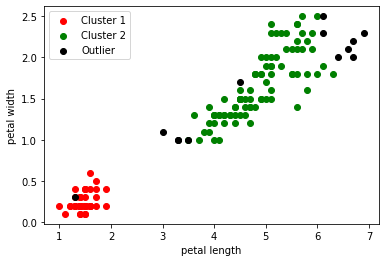

In [18]:
plt.scatter(iris[new_iris['pred_label']==0]['petal.length'], iris[new_iris['pred_label']==0]['petal.width'], c='red', label='Cluster 1')
plt.scatter(iris[new_iris['pred_label']==1]['petal.length'], iris[new_iris['pred_label']==1]['petal.width'], c='green', label='Cluster 2')
plt.scatter(iris[new_iris['pred_label']==-1]['petal.length'], iris[new_iris['pred_label']==-1]['petal.width'], c='black', label='Outlier')
plt.legend()
plt.xlabel('petal length')
plt.ylabel('petal width')

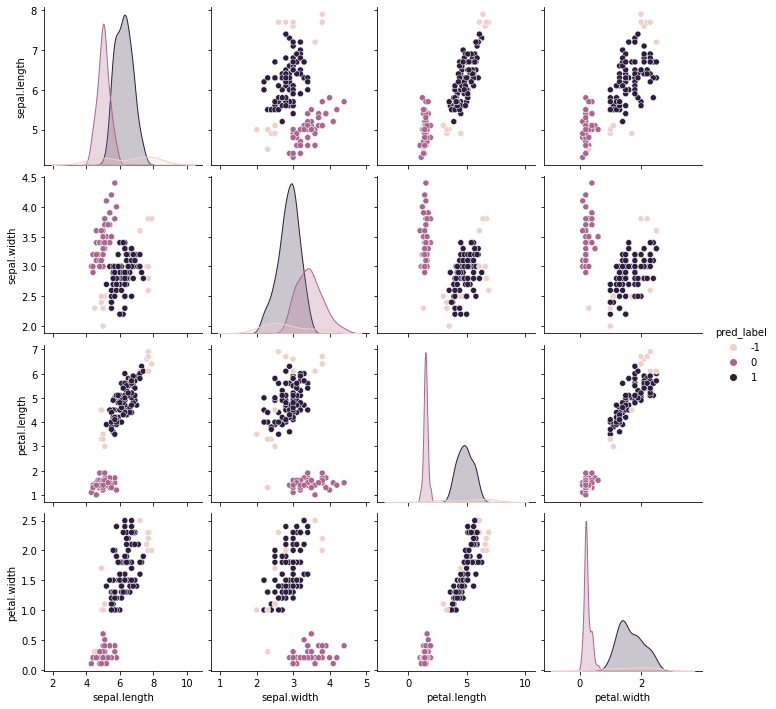

In [19]:
sns.pairplot(new_iris, hue='pred_label')

# Wine

In [20]:
wine = pd.read_csv('wine.csv')
wine.head()

Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0    14.23        1.71  2.43  15.6  127     2.80        3.06   
1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2    13.16        2.36  2.67  18.6  101     2.80        3.24   
3    14.37        1.95  2.50  16.8  113     3.85        3.49   
4    13.24        2.59  2.87  21.0  118     2.80        2.69   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  Wine  
0                  0.28     2.29       5.64  1.04  3.92     1065     1  
1                  0.26     1.28       4.38  1.05  3.40     1050     1  
2                  0.30     2.81       5.68  1.03  3.17     1185     1  
3                  0.24     2.18       7.80  0.86  3.45     1480     1  
4                  0.39     1.82       4.32  1.04  2.93      735     1

In [21]:
wine.describe()

Alcohol  Malic.acid         Ash         Acl          Mg     Phenols  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean    13.000618    2.336348    2.366517   19.494944   99.741573    2.295112   
std      0.811827    1.117146    0.274344    3.339564   14.282484    0.625851   
min     11.030000    0.740000    1.360000   10.600000   70.000000    0.980000   
25%     12.362500    1.602500    2.210000   17.200000   88.000000    1.742500   
50%     13.050000    1.865000    2.360000   19.500000   98.000000    2.355000   
75%     13.677500    3.082500    2.557500   21.500000  107.000000    2.800000   
max     14.830000    5.800000    3.230000   30.000000  162.000000    3.880000   

       Flavanoids  Nonflavanoid.phenols     Proanth   Color.int         Hue  \
count  178.000000            178.000000  178.000000  178.000000  178.000000   
mean     2.029270              0.361854    1.590899    5.058090    0.957449   
std      0.998859              0.124453    0.572359    2.318286    0.228572   
min      0.340000              0.130000    0.410000    1.280000    0.480000   
25%      1.205000              0.270000    1.250000    3.220000    0.782500   
50%      2.135000              0.340000    1.555000    4.690000    0.965000   
75%      2.875000              0.437500    1.950000    6.200000    1.120000   
max      5.080000              0.660000    3.580000   13.000000    1.710000   

               OD      Proline        Wine  
count  178.000000   178.000000  178.000000  
mean     2.611685   746.893258    1.938202  
std      0.709990   314.907474    0.775035  
min      1.270000   278.000000    1.000000  
25%      1.937500   500.500000    1.000000  
50%      2.780000   673.500000    2.000000  
75%      3.170000   985.000000    3.000000  
max      4.000000  1680.000000    3.000000

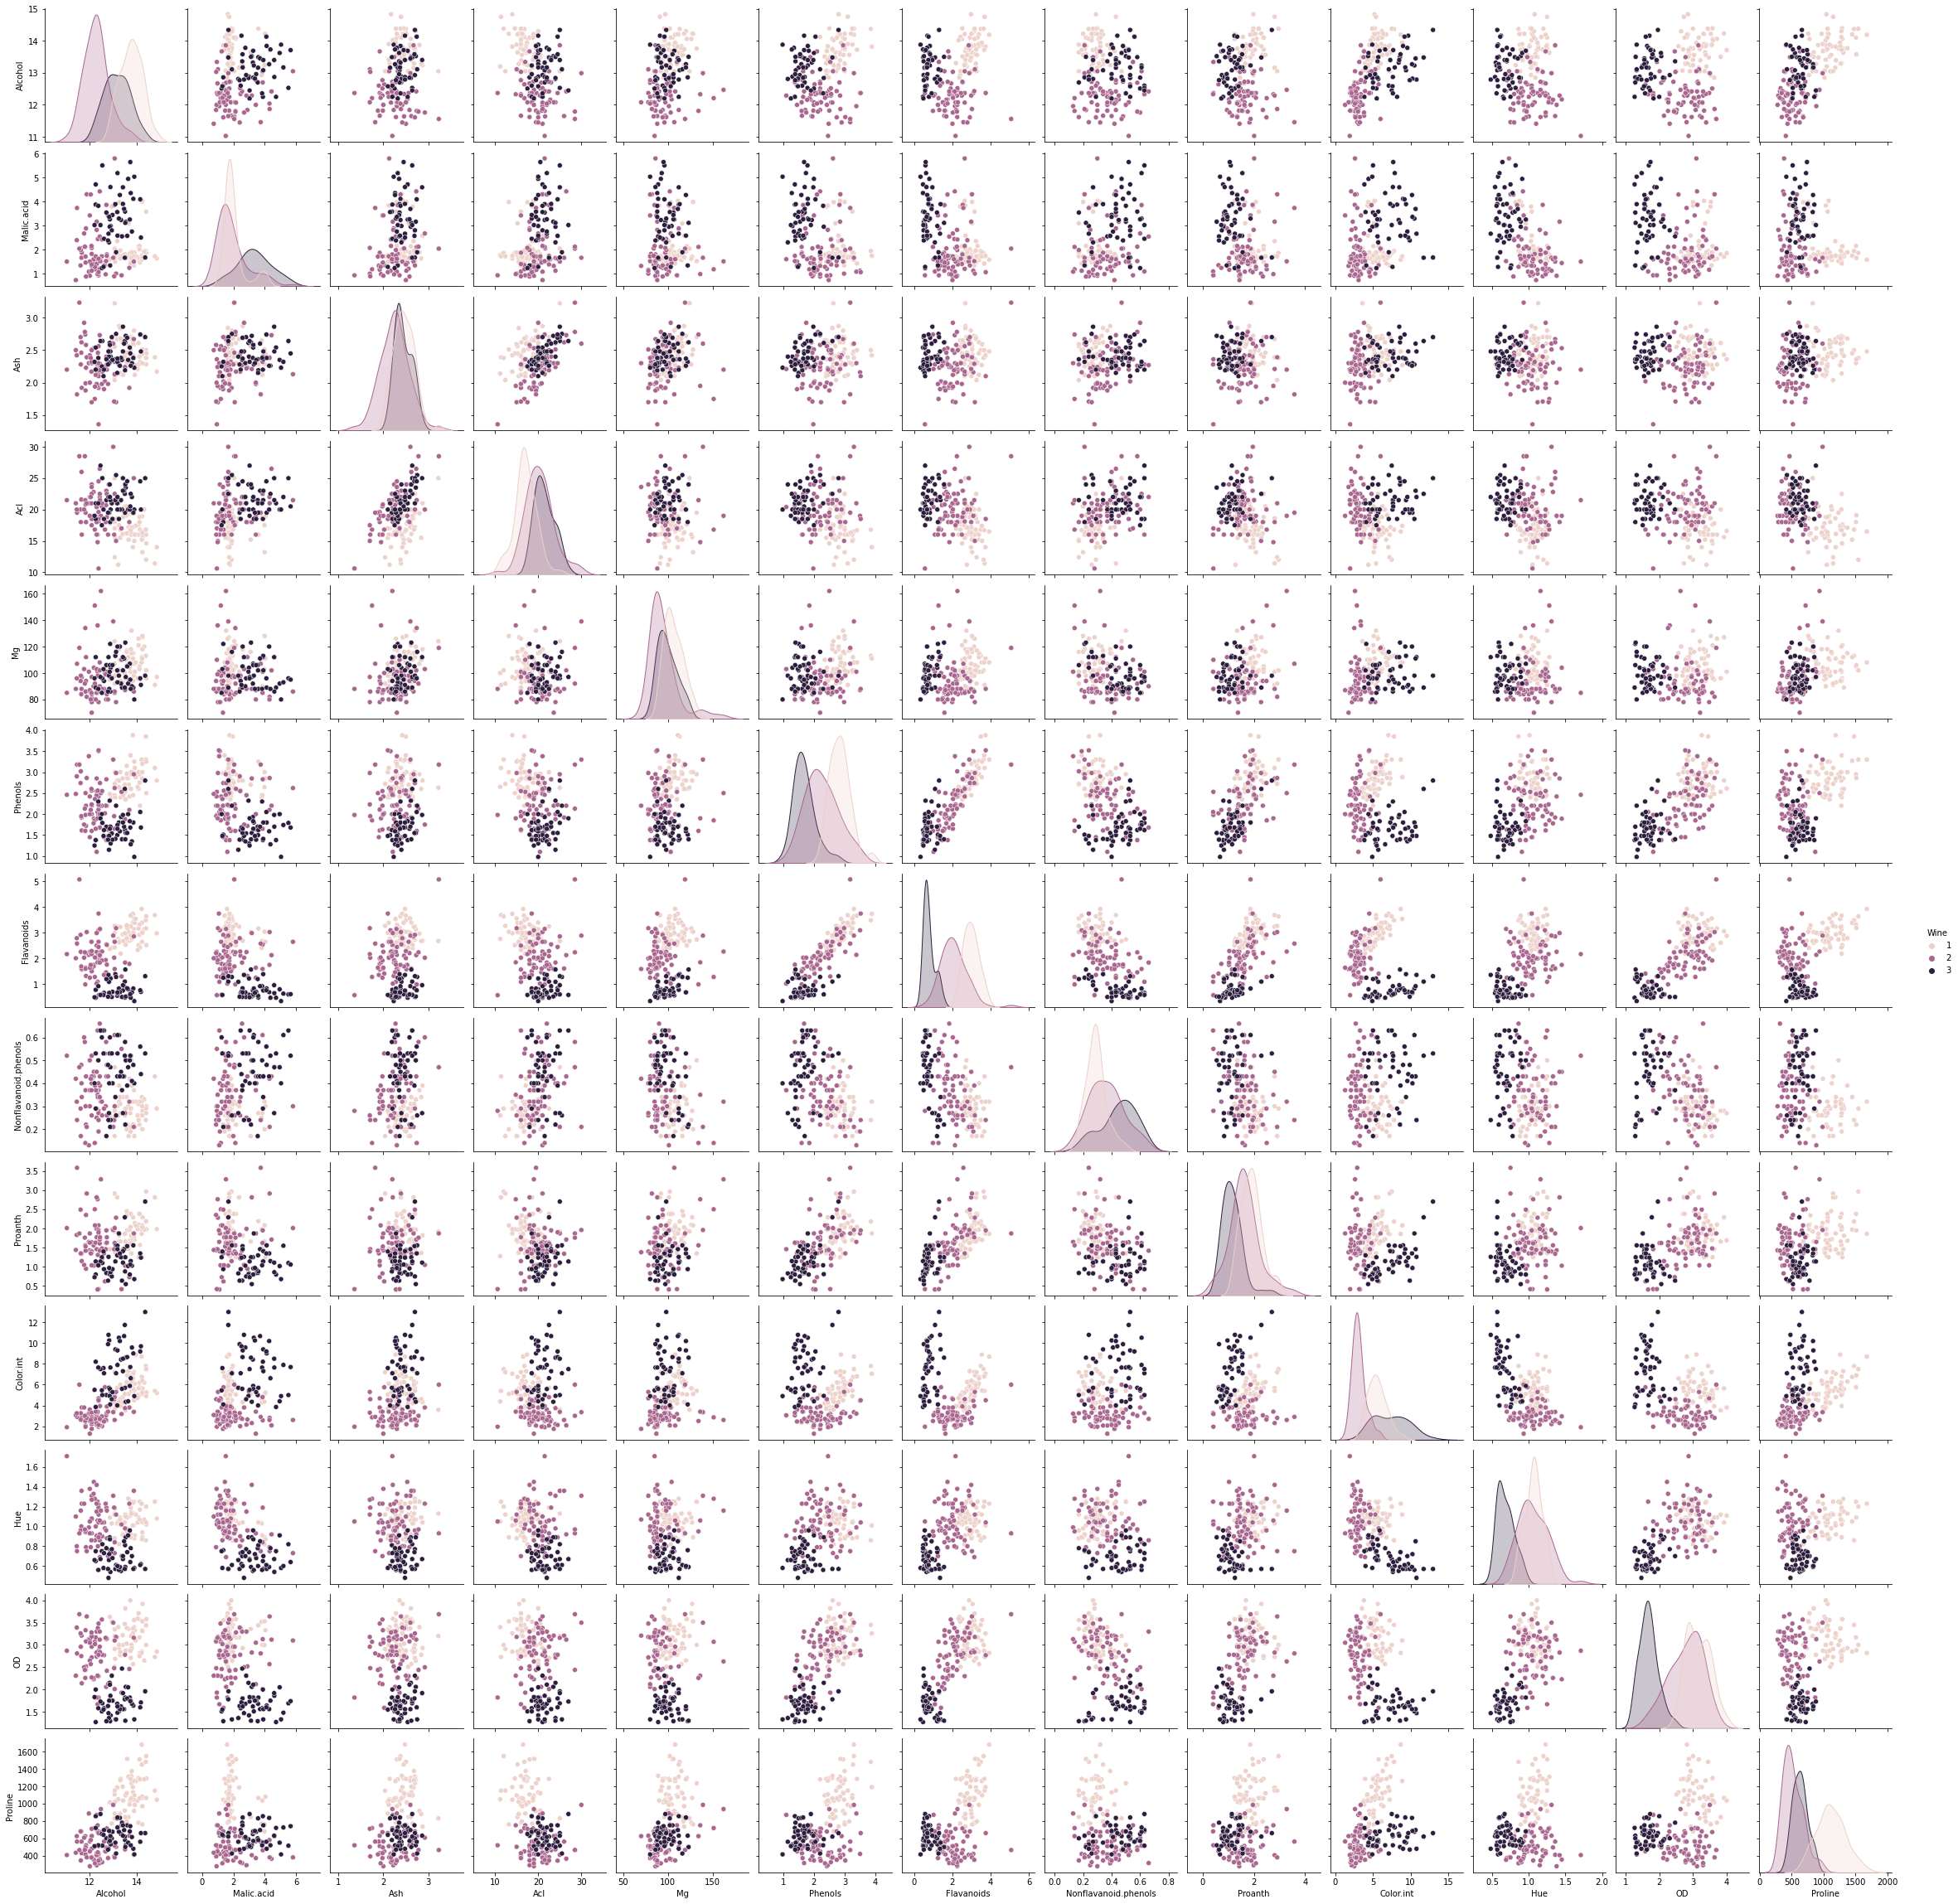

In [22]:
sns.pairplot(wine, hue='Wine')

Text(0, 0.5, 'Flavanoids')

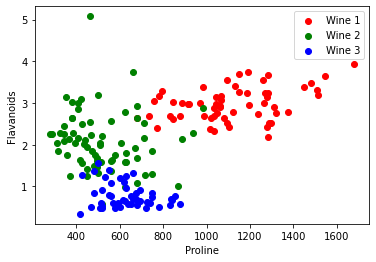

In [23]:
plt.scatter(wine[wine['Wine']==1]['Proline'], wine[wine['Wine']==1]['Flavanoids'], c='red', label='Wine 1')
plt.scatter(wine[wine['Wine']==2]['Proline'], wine[wine['Wine']==2]['Flavanoids'], c='green', label='Wine 2')
plt.scatter(wine[wine['Wine']==3]['Proline'], wine[wine['Wine']==3]['Flavanoids'], c='blue', label='Wine 3')
plt.legend()
plt.xlabel('Proline')
plt.ylabel('Flavanoids')

In [24]:
wine_true = wine['Wine'].to_numpy()
wine_num = wine_true.copy()
for i in range(0,len(wine_num)):
    if wine_num[i] == 1:
        wine_num[i] = 0
    if wine_num[i] == 2:
        wine_num[i] = 1
    if wine_num[i] == 3:
        wine_num[i] = 2

wine = wine.drop(['Wine'],axis=1)

Text(0.5, 1.0, 'Nearest Neighbors of Wine dataset')

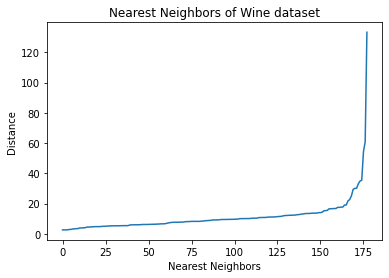

In [25]:
neighbors = NearestNeighbors().fit(wine)
distances, indices = neighbors.kneighbors(wine)
distances = np.sort(distances,axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.xlabel('Nearest Neighbors')
plt.ylabel('Distance')
plt.title('Nearest Neighbors of Wine dataset')

In [26]:
wine_score = pd.DataFrame(columns = score)

In [27]:
eps_list = np.arange(start=15, stop=45, step=1)
min_sample_list = np.arange(start=2, stop=30, step=1)

In [28]:
for i in eps_list:
    for j in min_sample_list:
        all_score = []
        dbscan = DBSCAN(eps=i, min_samples=j)
        wine_pred = dbscan.fit_predict(wine)
        outlier = True
        for item in wine_pred:
            if item != -1:
                outlier = False
                break
        if not outlier:
            all_score.append(i)
            all_score.append(j)
            all_score.append(silhouette_score(wine, wine_pred))
            all_score.append(davies_bouldin_score(wine, wine_pred))
            all_score.append(calinski_harabasz_score(wine, wine_pred))
            all_score.append(homogeneity_score(wine_true, wine_pred))
            all_score.append(completeness_score(wine_true, wine_pred))
            all_score.append(v_measure_score(wine_true, wine_pred))
            all_score.append(adjusted_rand_score(wine_true, wine_pred))
            all_score.append(adjusted_mutual_info_score(wine_true, wine_pred))
            all_score.append(accuracy(wine_num, wine_pred))
            wine_score.loc[len(wine_score.index)] = all_score

In [29]:
wine_score.head()

eps  minPoints  Silhouette_Score  Davies_Bouldin_Score  \
0  15.0        2.0          0.153540              3.348420   
1  15.0        3.0          0.063872              1.681371   
2  15.0        4.0          0.067751              2.420486   
3  15.0        5.0         -0.076930              0.987625   
4  15.0        6.0         -0.206393              1.167238   

   Calinski-Harabasz_Score  Homogeneity_Score  Completeness_Score  \
0                24.424857           0.520672            0.204170   
1                21.589338           0.444417            0.211019   
2                16.656965           0.399467            0.197484   
3                21.360259           0.312755            0.203251   
4                10.186612           0.225339            0.159807   

   V_Measure_Score  Adjusted_Random_Score  Adjusted_Mutual_Information_Score  \
0         0.293321               0.127167                           0.221192   
1         0.286162               0.158844                           0.241050   
2         0.264305               0.129841                           0.224086   
3         0.246384               0.095925                           0.217642   
4         0.186998               0.022385                           0.149097   

   Accuracy_Score  
0        0.011236  
1        0.044944  
2        0.056180  
3        0.089888  
4        0.061798

In [30]:
maxValues = wine_score.max()
 
print(maxValues)

eps                                   44.000000
minPoints                             29.000000
Silhouette_Score                       0.591530
Davies_Bouldin_Score                  29.083333
Calinski-Harabasz_Score              329.661943
Homogeneity_Score                      0.538166
Completeness_Score                     0.567164
V_Measure_Score                        0.433811
Adjusted_Random_Score                  0.426138
Adjusted_Mutual_Information_Score      0.430125
Accuracy_Score                         0.533708
dtype: float64


In [31]:
wine_show = wine_score.loc[wine_score['Accuracy_Score'] == wine_score['Accuracy_Score'].max()]
wine_show.head()

eps  minPoints  Silhouette_Score  Davies_Bouldin_Score  \
436  40.0        5.0          0.554583              0.747804   
460  41.0        5.0          0.554583              0.747804   
485  42.0        5.0          0.554583              0.747804   
512  43.0        5.0          0.554583              0.747804   
539  44.0        5.0          0.554583              0.747804   

     Calinski-Harabasz_Score  Homogeneity_Score  Completeness_Score  \
436               215.738734            0.33396            0.428652   
460               215.738734            0.33396            0.428652   
485               215.738734            0.33396            0.428652   
512               215.738734            0.33396            0.428652   
539               215.738734            0.33396            0.428652   

     V_Measure_Score  Adjusted_Random_Score  \
436         0.375427               0.241213   
460         0.375427               0.241213   
485         0.375427               0.241213   
512         0.375427               0.241213   
539         0.375427               0.241213   

     Adjusted_Mutual_Information_Score  Accuracy_Score  
436                            0.36344        0.533708  
460                            0.36344        0.533708  
485                            0.36344        0.533708  
512                            0.36344        0.533708  
539                            0.36344        0.533708

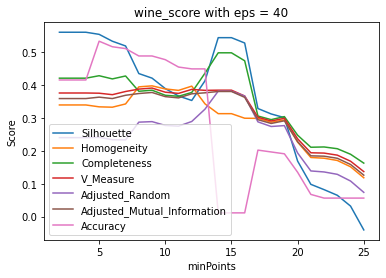

In [32]:
wine_plt = wine_score.loc[wine_score['eps']==40]

plt.plot(wine_plt['minPoints'], wine_plt['Silhouette_Score'], label='Silhouette')
#plt.plot(wine_plt['minPoints'], wine_plt['Davies_Bouldin_Score'], label='Davies_Bouldin')
#plt.plot(wine_plt['minPoints'], wine_plt['Calinski-Harabasz_Score'], label='Calinski-Harabasz')
plt.plot(wine_plt['minPoints'], wine_plt['Homogeneity_Score'], label='Homogeneity')
plt.plot(wine_plt['minPoints'], wine_plt['Completeness_Score'], label='Completeness')
plt.plot(wine_plt['minPoints'], wine_plt['V_Measure_Score'], label='V_Measure')
plt.plot(wine_plt['minPoints'], wine_plt['Adjusted_Random_Score'], label='Adjusted_Random')
plt.plot(wine_plt['minPoints'], wine_plt['Adjusted_Mutual_Information_Score'], label='Adjusted_Mutual_Information')
plt.plot(wine_plt['minPoints'], wine_plt['Accuracy_Score'], label='Accuracy')

plt.xlabel('minPoints')
plt.ylabel('Score')
plt.title('wine_score with eps = 40')
plt.legend()
plt.show()

In [36]:
dbscan = DBSCAN(eps=40, min_samples=5)
wine_pred = dbscan.fit_predict(wine)
print(wine_pred)
wine_pred_df = pd.DataFrame(wine_pred)
wine_pred_df.columns = ['pred_label']

new_wine = pd.concat([wine, wine_pred_df],axis=1)
outlier = new_wine.loc[new_wine['pred_label']==-1]

print(new_wine)
print(outlier)
print(len(outlier))

[ 0  0  0 -1  1 -1  2  2  0  0 -1  2  2  0 -1  2  2  0 -1  1  1  1  0  0
  1  1  0  2  1  0  2 -1  0  2  0  1  1  0  0  1  1  0  0  1  1  0  0  0
  0  2  0  2  0 -1  0  0  0  2  2  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1]
     Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0      14.23        1.71  2.43  15.6  127     2.80        3.06   
1      13.20        1.78  2.14  11.2  100     2.65        2.76   
2      13.16        2.36  2.67  18.6  101     2.80        3.24   
3      14.37        1.95  2.50  16.8  113     3.85        3.49   
4      13.24        2.59  2.87  21.0  118     2.80        2.69   
..       ...         ...   ...   ...  ...      ...         ..

Text(0, 0.5, 'Flavanoids')

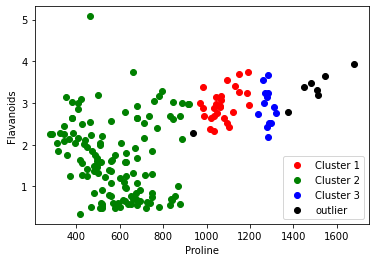

In [38]:
plt.scatter(wine[new_wine['pred_label']==0]['Proline'], wine[new_wine['pred_label']==0]['Flavanoids'], c='red', label='Cluster 1')
plt.scatter(wine[new_wine['pred_label']==1]['Proline'], wine[new_wine['pred_label']==1]['Flavanoids'], c='green', label='Cluster 2')
plt.scatter(wine[new_wine['pred_label']==2]['Proline'], wine[new_wine['pred_label']==2]['Flavanoids'], c='blue', label='Cluster 3')
plt.scatter(wine[new_wine['pred_label']==-1]['Proline'], wine[new_wine['pred_label']==-1]['Flavanoids'], c='black', label='outlier')
plt.legend()
plt.xlabel('Proline')
plt.ylabel('Flavanoids')

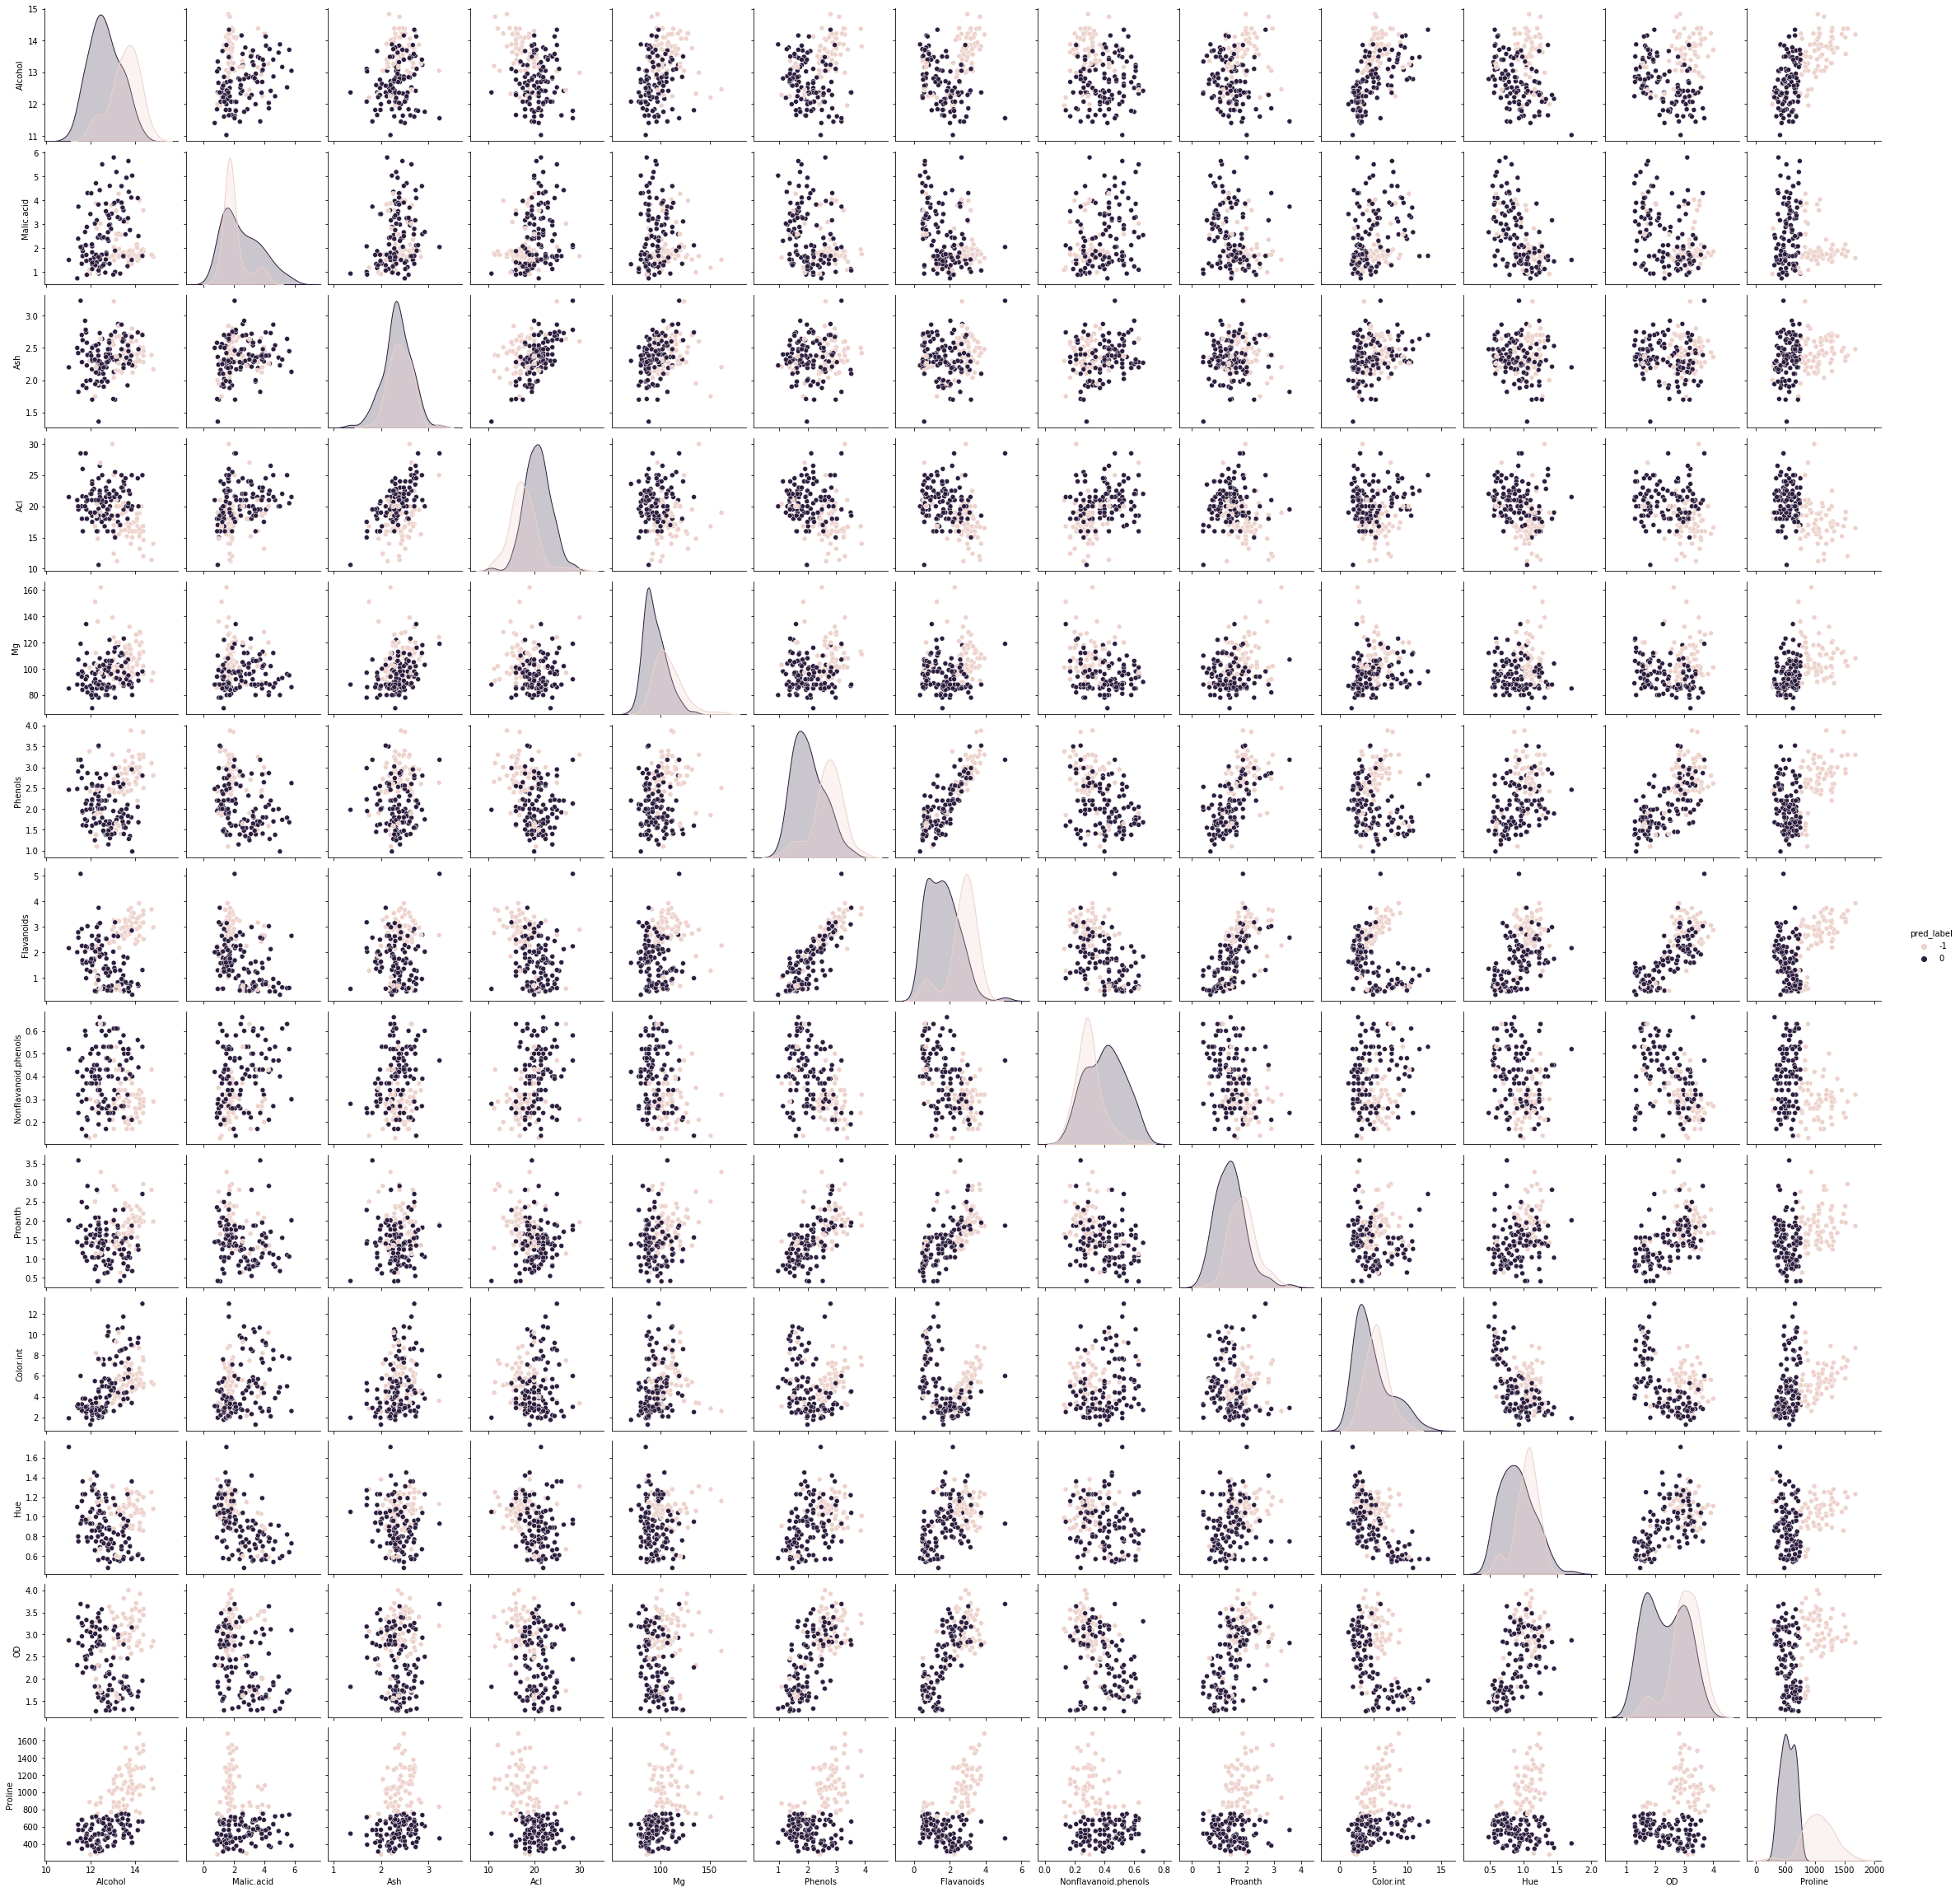

In [35]:
sns.pairplot(new_wine, hue='pred_label')